# Model Evaluation

## Review of our K Nearest Neighbor model

- Goal was to predict the **response value** of an **unknown observation**
    - predict the species of an unknown iris
    - predict the position of an unknown NBA player
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These procedures can be used with **any machine learning model**, not only KNN.

## Evaluation possibility #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [5]:
# read the NBA data into a DataFrame 
import pandas as pd
url = '../data/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [6]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [4]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
print(X.shape)

(478, 5)


In [7]:
X.head()

,ast,stl,blk,tov,pf
0,1.0,0.4,0.3,0.9,2.2
1,0.4,0.4,0.3,0.4,0.8
2,1.0,0.4,1.2,1.6,3.0
3,0.9,0.2,0.5,0.5,1.8
4,1.9,0.6,0.1,1.6,2.1


In [8]:
# create response vector (y)
y = nba.pos_num
# print(y)
print(y.shape)

(478L,)


### KNN (K=50)

In [9]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1,

In [10]:
# store the predicted response values
y_pred_class = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices *for classification* problems:

- **Classification accuracy**: percentage of correct predictions ("reward function" since higher is better)
- **Classification error**: percentage of incorrect predictions ("loss function" since lower is better)

In this case, we'll use classification accuracy.

In [11]:
# compute classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y, y_pred_class)

0.665271966527


This is known as **training accuracy** because we are evaluating the model on the same data we used to train the model.

### KNN (K=1)

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_class = knn.predict(X)
print metrics.accuracy_score(y, y_pred_class)

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- Maximizing *training accuracy* rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

![1NN classification map](images/iris_01nn_map.png)

## Evaluation possibility #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

What does this accomplish?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are known for the testing set, and thus **predictions can be evaluated**.

This is known as **testing accuracy** because we are evaluating the model on an independent "test set" that was not used during model training.

**Testing accuracy is a better estimate of out-of-sample performance than training accuracy.**

### First let's under "unpacking" in python since we are going to use it soon

In [13]:
list_1 = [1,"bar",3.0]
a, b, c = list_1
print(a)
print type(a)
print(b)
print type(b)
print (c)
print type(c)

1
<type 'int'>
bar
<type 'str'>
3.0
<type 'float'>


In [14]:
#Let's try the same with a function supplying the values in the list
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]

In [15]:
min_and_max = min_max([1, 2, 3])
print min_and_max
print type(min_and_max)

[1, 3]
<type 'list'>


In [16]:
the_min, the_max = min_max([1, 2, 3])
print the_min
print type(the_min)
print the_max
print type(the_max)

1
<type 'int'>
3
<type 'int'>


### Understanding the `train_test_split` function

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(478, 5)
(358, 5)
(120, 5)


In [20]:
print((1.0*358)/(1.0*478))
print((358)/(478+0.0))

0.748953974895
0.748953974895


In [21]:
# before splitting
print y.shape

# after splitting
print y_train.shape
print y_test.shape

(478L,)
(358L,)
(120L,)


![train_test_split](images/train_test_split.png)

### Understanding the `random_state` parameter

In [22]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y)

# print the first element of each object
print X_train.head(1)
print X_test.head(1)
print("")
print y_train.head(1)
print y_test.head(1)

     ast  stl  blk  tov   pf
119  2.0  0.9  1.6  1.6  2.5
     ast  stl  blk  tov   pf
154  2.9  1.0  0.3  1.2  3.0

119    0
Name: pos_num, dtype: int64
154    2
Name: pos_num, dtype: int64


In [23]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# print the first element of each object
print X_train.head(1)
print X_test.head(1)
print("")
print y_train.head(1)
print y_test.head(1)

     ast  stl  blk  tov   pf
401  2.9  1.3  0.2  1.4  2.3
    ast  stl  blk  tov   pf
32  1.5  0.9  0.6  1.1  3.1

401    2
Name: pos_num, dtype: int64
32    1
Name: pos_num, dtype: int64


### Using the train/test split procedure (K=1)

In [24]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [25]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.616666666667


## Repeating for K=50

In [27]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.675


![Bias-variance tradeoff](images/bias_variance.png)

### Comparing testing accuracy with null accuracy

Null accuracy is the accuracy that could be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure your classification model.

In [29]:
# examine the class distribution
y_test.value_counts()

2    60
1    49
0    11
Name: pos_num, dtype: int64

In [31]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

2    0.5
Name: pos_num, dtype: float64

### Searching for the "best" value of K

In [32]:
# calculate TRAINING Accuracy and TESTING accuracy for K=1 through 100

k_range = range(1, 101)
training_error_rate = []
testing_error_rate = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error_rate.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error_rate.append(1 - testing_accuracy)

In [33]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
# create a DataFrame of K, training accuracy, and testing acc
column_dict = {'K': k_range, 'training error rate':training_error_rate, 'testing error rate':testing_error_rate}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,testing error rate,training error rate
K,,
1,0.383333,0.000000
2,0.450000,0.184100
3,0.366667,0.190377
4,0.383333,0.221757
5,0.325000,0.251046


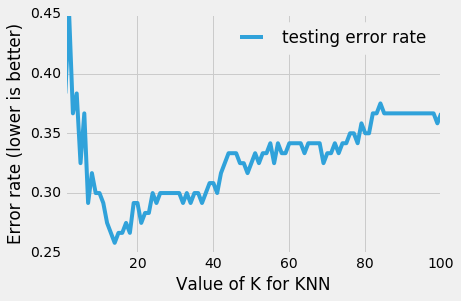

In [35]:
# plot the relationship between K (HIGH TO LOW) and TESTING Accuracy
df.plot(y='testing error rate')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate (lower is better)')

In [36]:
# find the minimum testing error and the associated K value
df.sort_values(by='testing error rate').head()

,testing error rate,training error rate
K,,
14,0.258333,0.286611
13,0.266667,0.282427
18,0.266667,0.284519
16,0.266667,0.282427
15,0.266667,0.284519


In [37]:
# alternative method
min(zip(testing_error_rate, k_range)) 

(0.2583333333333333, 14)

What could we conclude?

- When using KNN on this dataset with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

### Training error versus testing error

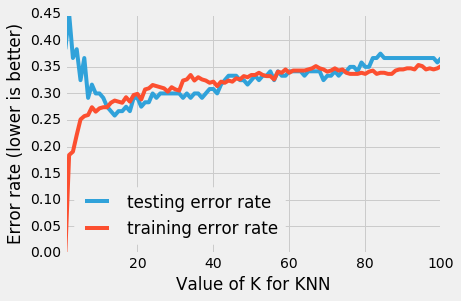

In [38]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

![Bias-variance tradeoff](images/training_testing_error.png)

## Making predictions on out-of-sample data

Given the statistics of a (truly) unknown player, how do we predict his position?

In [39]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=14)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[1, 1, 0, 1, 2]])

array([1], dtype=int64)

## Disadvantages of train/test split?

What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [40]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.741666666667


In [41]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.666666666667


- Test/train split accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**